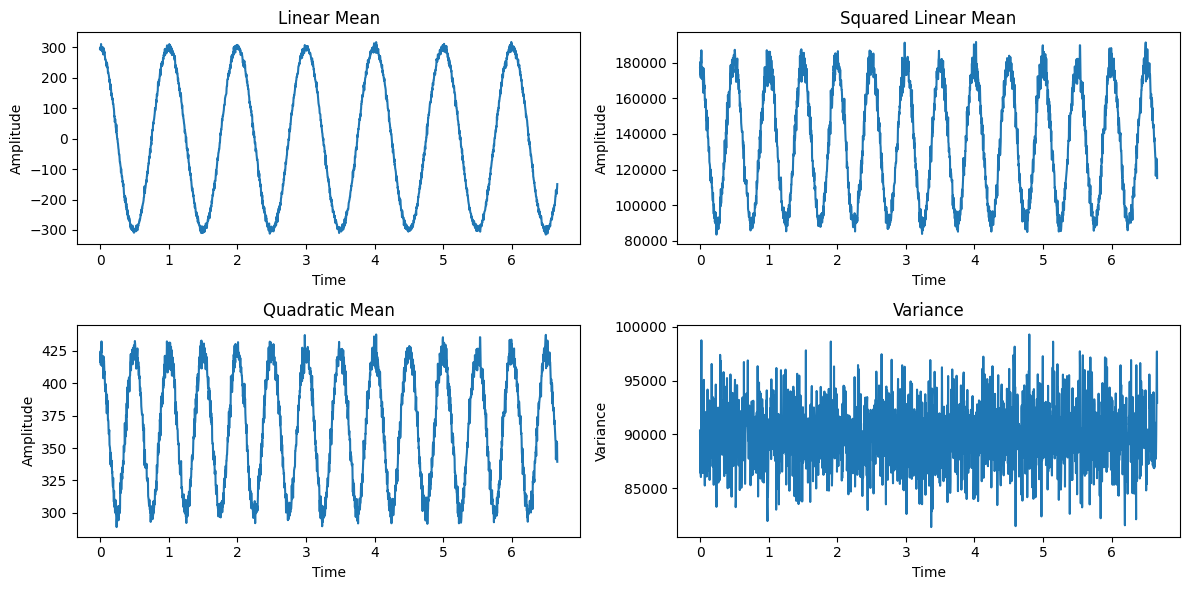

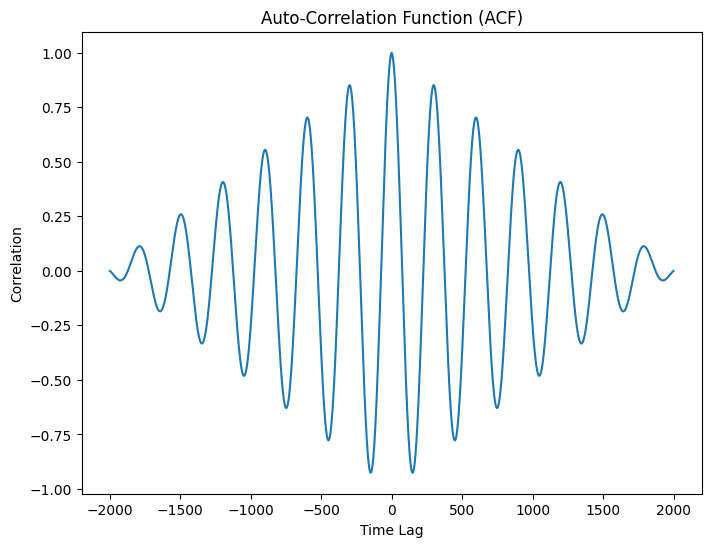

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters from the table
f = 300
A = 300.25
B = 299.75
N = 2000

# Generate the ensemble of random signals
signals = []
for n in range(N):
    Wn = np.random.normal(0, 1, N)  # Generate Wn for each time index
    xn = A * np.cos(2 * np.pi * np.arange(N) / f) + B * Wn
    signals.append(xn)


signals = np.array(signals)

# 1. Estimate the linear mean as ensemble average
linear_mean = np.mean(signals, axis=0)

# 2. Estimate the linear mean and squared linear mean
linear_mean_2 = np.mean(signals ** 2, axis=0)

# 3. Estimate the quadratic mean and variance
quadratic_mean = np.sqrt(np.mean(signals ** 2, axis=0))
variance = np.var(signals, axis=0)

# 4. Plot 1-4
t = np.arange(N) / f
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(t, linear_mean)
plt.title('Linear Mean')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(2, 2, 2)
plt.plot(t, linear_mean_2)
plt.title('Squared Linear Mean')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(2, 2, 3)
plt.plot(t, quadratic_mean)
plt.title('Quadratic Mean')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(2, 2, 4)
plt.plot(t, variance)
plt.title('Variance')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.tight_layout()
plt.show()

# 5. Estimate and plot the auto-correlation function (ACF)
acf = np.correlate(signals.mean(axis=0), signals.mean(axis=0), mode='full')
acf /= acf.max()  # Normalize ACF
lags = np.arange(-N + 1, N)

plt.figure(figsize=(8, 6))
plt.plot(lags, acf)
plt.title('Auto-Correlation Function (ACF)')
plt.xlabel('Time Lag')
plt.ylabel('Correlation')
plt.show()

